In [67]:
import numpy as np
import matplotlib.pyplot as plt
import math
plt.style.use('seaborn-whitegrid') # puts gridlines in background of plot

# Linear Regression with Outlier

In [68]:
x = np.array([117.7, 114, 117, 117.7]) # critical_temp
y = np.array([0.12, 0.21, 0.33, 0.42]) # current
m = -32.94297124092314 # used for determining error in temperature
temp_err = m * 0.005 # error in temperature in millivots
err_y = np.array([temp_err, temp_err, temp_err, temp_err]) # error in current. This error is actually due to temperature error
err_y *= -1
err_y

array([0.16471486, 0.16471486, 0.16471486, 0.16471486])

In [69]:
delta = sum(1/err_y**2) * sum(x**2/err_y**2) - (sum(x/err_y**2))**2
m = (sum(1/err_y**2) * sum(x*y/err_y**2) - sum(x/err_y**2) * sum(y/err_y**2)) / delta
b = (sum(x**2/err_y**2) * sum(y/err_y**2) - sum(x/err_y**2) * sum(x*y/err_y**2)) / delta

errm = math.sqrt(sum(1/err_y**2) / delta)
errb = math.sqrt(sum(x**2/err_y**2) / delta)
fittemp = m*(x) + b

#calculating chi-squared
deg_of_freedom = 2
chisq = sum((y - fittemp)**2/err_y**2)
reduced_chisq = chisq / deg_of_freedom

['fit slope = 0.019 ± 0.054',
 'fit intercept = -1.977 ± 6.285',
 'Chi-squared: 1.8',
 'Reduced Chi-squared: 0.9']

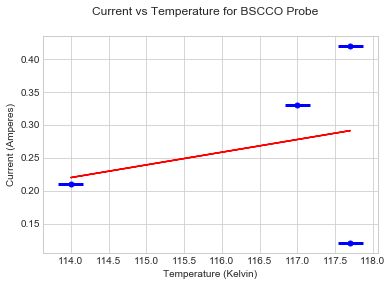

In [70]:
plt.errorbar(x, y, xerr = temp_err, fmt = "bo", markersize = "5", linewidth=3)
plt.ylabel('Current (Amperes)')
plt.xlabel('Temperature (Kelvin)')
plt.suptitle("Current vs Temperature for BSCCO Probe")

plt.plot(x, m * x + b, 'r') # Plotting line of best fit
plt.savefig('with_outlier.png')

m_rounded = str(round(float(m), 3))
merr_rounded = str(round(float(errm), 3))
b_rounded = str(round(float(b), 3))
berr_rounded = str(round(float(errb), 3))
chisq_rounded = str(round(float(chisq), 2))
reduced_chisq_rounded = str(round(float(reduced_chisq), 2))

uncertainties = ["fit slope = " + m_rounded + u" \u00B1 " + merr_rounded,
"fit intercept = " + b_rounded + u" \u00B1 " + berr_rounded,
"Chi-squared: " + str(chisq_rounded),
"Reduced Chi-squared: " + str(reduced_chisq_rounded)]
uncertainties

# Determining Critical Current by Extrapolation to 77 Kelvin

In [71]:
critical_current = np.absolute(m * 77 + b)
critical_current_err = math.sqrt((77*errm)**2 + errb**2)
critical_current, critical_current_err

(0.4931691648845109, 7.531403725364836)

# Linear Regression without Outlier

In [72]:
x = np.array([117.7, 114, 117.7]) # critical_temp
y = np.array([0.12, 0.21, 0.42]) # current
m = -32.94297124092314 # used for determining error in temperature
temp_err = m * 0.005 # error in temperature in millivots
err_y = np.array([temp_err, temp_err, temp_err]) # error in current. This error is actually due to temperature error
err_y *= -1
err_y

array([0.16471486, 0.16471486, 0.16471486])

In [73]:
delta = sum(1/err_y**2) * sum(x**2/err_y**2) - (sum(x/err_y**2))**2
m = (sum(1/err_y**2) * sum(x*y/err_y**2) - sum(x/err_y**2) * sum(y/err_y**2)) / delta
b = (sum(x**2/err_y**2) * sum(y/err_y**2) - sum(x/err_y**2) * sum(x*y/err_y**2)) / delta

errm = math.sqrt(sum(1/err_y**2) / delta)
errb = math.sqrt(sum(x**2/err_y**2) / delta)
fittemp = m*(x) + b

#calculating chi-squared
deg_of_freedom = 1
chisq = sum((y - fittemp)**2/err_y**2)
reduced_chisq = chisq / deg_of_freedom

['fit slope = 0.016 ± 0.055',
 'fit intercept = -1.639 ± 6.351',
 'Chi-squared: 1.66',
 'Reduced Chi-squared: 1.66']

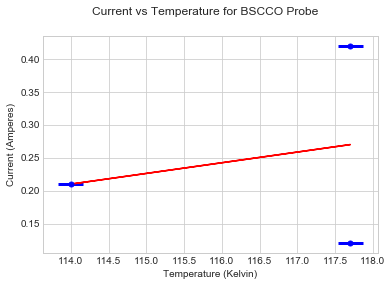

In [74]:
plt.errorbar(x, y, xerr = temp_err, fmt = "bo", markersize = "5", linewidth=3)
plt.ylabel('Current (Amperes)')
plt.xlabel('Temperature (Kelvin)')
plt.suptitle("Current vs Temperature for BSCCO Probe")

plt.plot(x, m * x + b, 'r') # Plotting line of best fit
plt.savefig('without_outlier.png')

m_rounded = str(round(float(m), 3))
merr_rounded = str(round(float(errm), 3))
b_rounded = str(round(float(b), 3))
berr_rounded = str(round(float(errb), 3))
chisq_rounded = str(round(float(chisq), 2))
reduced_chisq_rounded = str(round(float(reduced_chisq), 2))

uncertainties = ["fit slope = " + m_rounded + u" \u00B1 " + merr_rounded,
"fit intercept = " + b_rounded + u" \u00B1 " + berr_rounded,
"Chi-squared: " + str(chisq_rounded),
"Reduced Chi-squared: " + str(reduced_chisq_rounded)]
uncertainties

# Determining Critical Current by Extrapolation to 77 Kelvin

In [75]:
critical_current = np.absolute(m * 77 + b)
critical_current_err = math.sqrt((77*errm)**2 + errb**2)
critical_current, critical_current_err

(0.390000000000972, 7.61299072992363)